In [120]:
import tensorflow as tf
import numpy as np
import os
import warnings
import csv
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as pl
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [121]:
image_path='output/train/Train/'
mask_path='output/train/Mask/'

In [122]:
image_list=os.listdir(image_path)
mask_list=os.listdir(mask_path)

In [123]:
img=cv2.imread(image_path+image_list[0])
img=cv2.resize(img,(64,64))
img=img/255.0

In [124]:
X_train=[]
y_train=[]
for list_i in image_list:
    
    img=image.load_img(image_path+list_i,target_size=(64,64,3))
    img=image.img_to_array(img)
    img=img/255.0
    #img=preprocess_input(img)
    X_train.append(img)

for list_i in mask_list:    
    msk=image.load_img(mask_path+list_i,grayscale=True,target_size=(64,64,1))
    msk=image.img_to_array(msk)
    msk=msk/255.0
    y_train.append(np.squeeze(msk))
    

In [125]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [126]:
print(X_train.shape)
print(y_train.shape)

(218, 64, 64, 3)
(218, 64, 64)


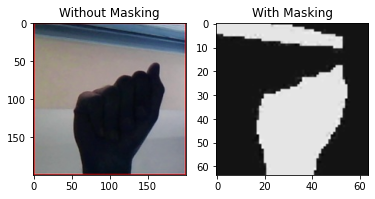

In [127]:
img=cv2.imread((image_path+image_list[0]))
subplot(img,y_train[0])

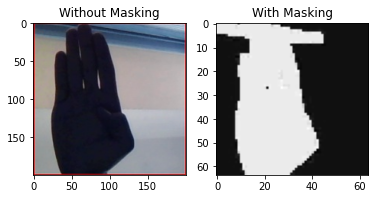

In [128]:
img=cv2.imread((image_path+image_list[100]))
subplot(img,y_train[100])

**To be done:**<br>
1. Create validation data along with mask<br>
2. Run on Transfer learning and check

In [129]:
image_path='output/val/Val/'
mask_path='output/val/Mask/'

In [130]:
image_list=os.listdir(image_path)
mask_list=os.listdir(mask_path)

In [131]:
mask_list

['mask000.jpg',
 'mask001.jpg',
 'mask002.jpg',
 'mask003.jpg',
 'mask004.jpg',
 'mask005.jpg',
 'mask006.jpg',
 'mask007.jpg',
 'mask008.jpg',
 'mask009.jpg',
 'mask010.jpg',
 'mask011.jpg',
 'mask012.jpg',
 'mask013.jpg',
 'mask014.jpg',
 'mask015.jpg',
 'mask016.jpg',
 'mask017.jpg',
 'mask018.jpg',
 'mask019.jpg',
 'mask020.jpg',
 'mask021.jpg',
 'mask022.jpg',
 'mask023.jpg',
 'mask024.jpg',
 'mask025.jpg',
 'mask026.jpg',
 'mask027.jpg',
 'mask028.jpg',
 'mask029.jpg',
 'mask030.jpg',
 'mask031.jpg',
 'mask032.jpg',
 'mask033.jpg',
 'mask034.jpg',
 'mask035.jpg',
 'mask036.jpg',
 'mask037.jpg',
 'mask038.jpg',
 'mask039.jpg',
 'mask040.jpg',
 'mask041.jpg',
 'mask042.jpg',
 'mask043.jpg',
 'mask044.jpg',
 'mask045.jpg',
 'mask046.jpg']

In [132]:
X_val=[]
y_val=[]
for i in image_list:
    img=image.load_img((image_path+i),target_size=(64,64,3))
    img=image.img_to_array(img)
    img=img/255.0
    #img=preprocess_input(img)
    X_val.append(img)

for i in mask_list:
    msk=image.load_img((mask_path+i),grayscale=True,target_size=(64,64,1))
    msk=image.img_to_array(msk)
    msk=msk/255.0
    y_val.append(np.squeeze(msk))

In [133]:
X_val=np.array(X_val)
y_val=np.array(y_val)

In [134]:
print(X_val.shape)
print(y_val.shape)

(47, 64, 64, 3)
(47, 64, 64)


In [135]:
from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input
from tensorflow.keras.layers import Concatenate, Conv2D, Reshape, UpSampling2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

In [136]:
def create_model(trainable=True):
    model = VGG16(input_shape=(64, 64, 3), include_top=False,  weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
    
    
    #x=model.layers[-1].output
        
    c4= model.get_layer("block5_conv3").output
    c3=model.get_layer("block4_conv3").output
    c2=model.get_layer("block3_conv3").output
    c1=model.get_layer("block2_conv2").output
    
    
    ip=model.layers[-1].output
    
    x=UpSampling2D((2,2))(ip)
    x=Concatenate()([x,c4])
    
    x=Conv2D(128,(3,3),padding='same')(x)
    
    x=UpSampling2D((2,2))(x)
    x=Concatenate()([x,c3])
    
    x=Conv2D(64,(3,3),padding='same')(x)
    
    x=UpSampling2D((2,2))(x)
    x=Concatenate()([x,c2])
    
    x=Conv2D(32,(3,3),padding='same')(x)
    
    x=UpSampling2D((2,2))(x)
    x=Concatenate()([x,c1])
    
    x=Conv2D(16,(3,3),padding='same')(x)
    
    x=UpSampling2D((2,2))(x)
    
    x=Conv2D(8,(1,1),padding='same')(x)
    
    x=Conv2D(1,(1,1),padding='same',activation='sigmoid')(x)
    


    return Model(inputs=model.input, outputs=x)

In [137]:
model=create_model()

In [138]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 64, 64, 64)   1792        input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 64, 64, 64)   36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 32, 32, 64)   0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [139]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,UpSampling2D,Concatenate,Reshape

In [140]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [141]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.keras.backend.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [142]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [143]:
model.fit(X_train,y_train,epochs=10,batch_size=2,verbose=1,validation_data=[X_val,y_val])

Train on 218 samples, validate on 47 samples
Epoch 1/10
218/218 [==============================] - 36s 167ms/sample - loss: 1.3844 - dice_coefficient: 0.7264 - val_loss: 0.9153 - val_dice_coefficient: 0.6971
Epoch 2/10
218/218 [==============================] - 36s 167ms/sample - loss: 0.7953 - dice_coefficient: 0.7484 - val_loss: 0.8351 - val_dice_coefficient: 0.7104
Epoch 3/10
218/218 [==============================] - 36s 165ms/sample - loss: 0.7587 - dice_coefficient: 0.7522 - val_loss: 0.8159 - val_dice_coefficient: 0.7145
Epoch 4/10
218/218 [==============================] - 37s 169ms/sample - loss: 0.7476 - dice_coefficient: 0.7536 - val_loss: 0.7984 - val_dice_coefficient: 0.7146
Epoch 5/10
218/218 [==============================] - 37s 168ms/sample - loss: 0.7401 - dice_coefficient: 0.7544 - val_loss: 0.8001 - val_dice_coefficient: 0.7123
Epoch 6/10
218/218 [==============================] - 36s 166ms/sample - loss: 0.7361 - dice_coefficient: 0.7550 - val_loss: 0.7854 - val_di

In [ ]:
wts=

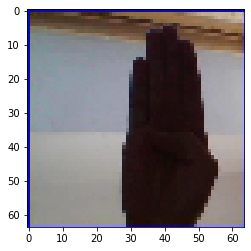

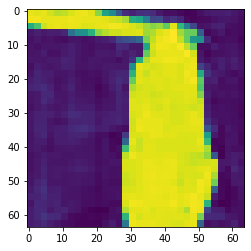

In [112]:
img=image.load_img((image_path+image_list[5]),target_size=(64,64))
img=image.img_to_array(img)
img=img/255.0
plt.imshow(img)
plt.show()


pred=model.predict(np.array([img]))
plt.imshow(pred[0])

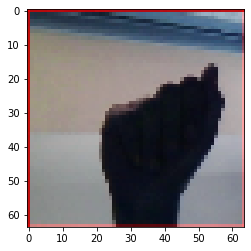

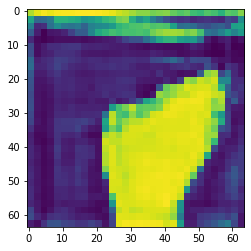

(1, 64, 64, 1)
(64, 64, 1)
(64, 64)


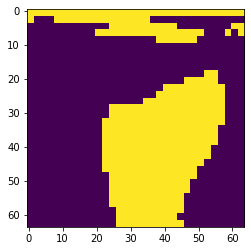

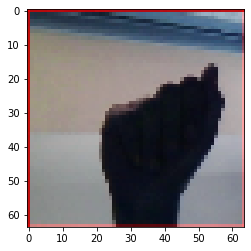

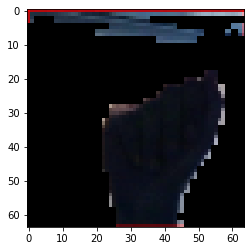

In [113]:
img=cv2.imread((image_path+image_list[0]))
img=cv2.resize(img,(64,64))
img=img/255.0
plt.imshow(img)
plt.show()

pred=model.predict(np.array([img]))
plt.imshow(pred[0])
plt.show()
print(pred.shape)

print((pred>0.5)[0].shape)

img_pred=cv2.resize(1.0*(pred>0.5)[0],(64,64))
print(img_pred.shape)
plt.imshow(img_pred)
plt.show()


img_1=img.copy()
plt.imshow(img)
plt.show()

img_1[:,:,0]=img_pred*img[:,:,0]
img_1[:,:,1]=img_pred*img[:,:,1]
img_1[:,:,2]=img_pred*img[:,:,2]

plt.imshow(img_1)

In [114]:
path='output/test/WIN_20210617_22_27_11_Pro.jpg'
img=image.load_img(path,target_size=(64,64,3))
img=image.img_to_array(img)
img=img/255.0
img=np.expand_dims(img,0)

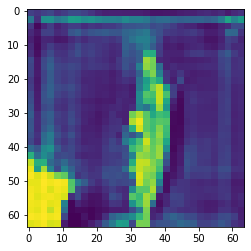

In [115]:
pred=model.predict(img)
pred=np.squeeze(pred)
plt.imshow(pred)

In [116]:
img_1=img[0]

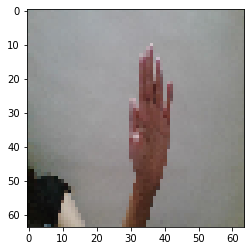

In [117]:
plt.imshow(img_1)

(1, 64, 64, 1)


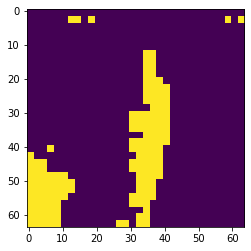

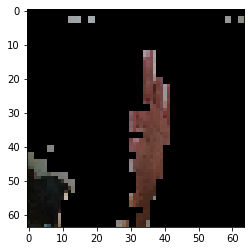

In [118]:
pred=model.predict(img)
print(pred.shape)

img_pred=cv2.resize(1.0*(pred>0.5)[0],(64,64))
plt.imshow(img_pred)

plt.show()

img_2=img_1.copy()
img_2[:,:,0]=img_pred*img_1[:,:,0]
img_2[:,:,1]=img_pred*img_1[:,:,1]
img_2[:,:,2]=img_pred*img_1[:,:,2]

plt.imshow(img_2)

In [119]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing

In [101]:
model_unet=Unet(input_shape=(64,64,3))

In [102]:
model_unet.compile(optimizer='sgd',loss=loss,metrics=[dice_coefficient])

In [103]:
model_unet.fit(X_train,y_train,batch_size=50,epochs=10,verbose=1,validation_data=[X_val,y_val])

Train on 218 samples, validate on 47 samples
Epoch 1/10
218/218 [==============================] - 44s 201ms/sample - loss: 1.4825 - dice_coefficient: 0.5069 - val_loss: 1.6289 - val_dice_coefficient: 0.5021
Epoch 2/10
218/218 [==============================] - 39s 179ms/sample - loss: 1.2516 - dice_coefficient: 0.5563 - val_loss: 1.3142 - val_dice_coefficient: 0.5502
Epoch 3/10
218/218 [==============================] - 39s 179ms/sample - loss: 1.1330 - dice_coefficient: 0.5878 - val_loss: 1.1970 - val_dice_coefficient: 0.5798
Epoch 4/10
218/218 [==============================] - 39s 179ms/sample - loss: 1.0506 - dice_coefficient: 0.6122 - val_loss: 1.1365 - val_dice_coefficient: 0.5985
Epoch 5/10
218/218 [==============================] - 39s 177ms/sample - loss: 0.9873 - dice_coefficient: 0.6348 - val_loss: 1.0992 - val_dice_coefficient: 0.6114
Epoch 6/10
218/218 [==============================] - 39s 177ms/sample - loss: 0.9392 - dice_coefficient: 0.6508 - val_loss: 1.0712 - val_di

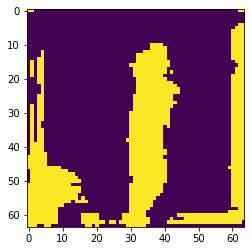

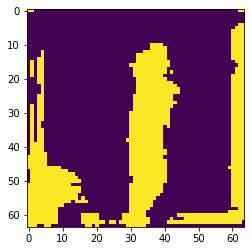

(64, 64)


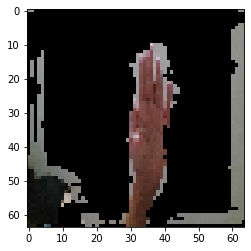

In [104]:
path='output/test/WIN_20210617_22_27_11_Pro.jpg'
img=image.load_img(path,target_size=(64,64,3))
img=image.img_to_array(img)
img=img/255.0
img=np.expand_dims(img,0)
pred=model_unet.predict(img)
img_1=img[0]
plt.imshow((pred>0.5)[0])
plt.show()
pred_mask=cv2.resize(1.0*(pred>0.5)[0],(64,64))
plt.imshow(pred_mask)
plt.show()

print(pred_mask.shape)

img_2=img_1
img_2[:,:,0]=pred_mask*img_1[:,:,0]
img_2[:,:,1]=pred_mask*img_1[:,:,1]
img_2[:,:,2]=pred_mask*img_1[:,:,2]

plt.imshow(img_2)